# Simple Dense Neural Network
This is a full end-to-end experiment for classifying sounds as speech vs. no speech. See the other notebooks/scripts for data preprocessing. In summary, the raw audio files were converted into Mel Spectrograms. These Mel Spectrograms are what is to be fed into the neural network. In this experiment, a simple shallow dense neural network is used. 

## Load in Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pickle

# load in labels and samples for the training subset
training_samples_file = open('path/training_samples.pkl', 'rb')
training_labels_file = open('path/training_labels.pkl', 'rb')

# load in labels and samples for the test subset
test_samples_file = open('path/test_samples.pkl', 'rb')
test_labels_file = open('path/test_labels.pkl', 'rb')

In [5]:
# training
X = pickle.load(training_samples_file)
y = pickle.load(training_labels_file)

# test
test_samples = pickle.load(test_samples_file)
test_labels = pickle.load(test_labels_file)

In [6]:
# convert X to Numpy array since I forgot to in training data preprocessing 
import numpy as np 
X = np.array(X)

## Build the Model

In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 431)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
]) # inspired by https://www.tensorflow.org/tutorials/keras/classification

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 55168)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7061632   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 7,061,890
Trainable params: 7,061,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(X, y, epochs=250)

Epoch 1/250
92/92 [==============================] - 4s 46ms/step - loss: 0.0208 - accuracy: 0.9952
Epoch 2/250
92/92 [==============================] - 4s 46ms/step - loss: 0.0163 - accuracy: 0.9969
Epoch 3/250
92/92 [==============================] - 4s 46ms/step - loss: 0.0145 - accuracy: 0.9973
Epoch 4/250
92/92 [==============================] - 4s 48ms/step - loss: 0.0135 - accuracy: 0.9973
Epoch 5/250
92/92 [==============================] - 4s 47ms/step - loss: 0.0124 - accuracy: 0.9976
Epoch 6/250
92/92 [==============================] - 4s 46ms/step - loss: 0.0115 - accuracy: 0.9976
Epoch 7/250
92/92 [==============================] - 4s 46ms/step - loss: 0.0105 - accuracy: 0.9976
Epoch 8/250
92/92 [==============================] - 4s 45ms/step - loss: 0.0097 - accuracy: 0.9976
Epoch 9/250
92/92 [==============================] - 4s 46ms/step - loss: 0.0089 - accuracy: 0.9976
Epoch 10/250
92/92 [==============================] - 4s 46ms/step - loss: 0.0082 - accuracy: 0.9976

In [12]:
history_dict = history.history
print(history_dict.keys())
# to keep for later 
%store history_dict

dict_keys(['loss', 'accuracy'])
Stored 'history_dict' (dict)


#### Plot graphs

In [13]:
# imports 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [14]:
# function to plot training given history dictionary 
def plot_training(history_dict):
	"""
	Plots the training accuracy and loss graphs for a Keras model (validation graphs not included). 
	Parameters:
		- history_dict: a dictionary of "history" object from Keras 
	"""
	# plot training accuracy graph 
	plt.plot(history_dict['accuracy'])
	plt.title('Training Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

	# plot training loss graph 
	plt.plot(history_dict['loss'])
	plt.title('Training Loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show() 

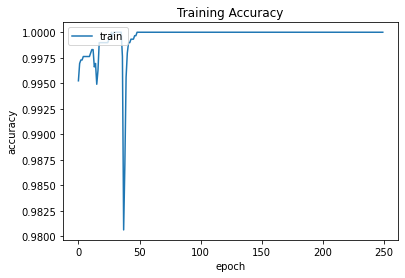

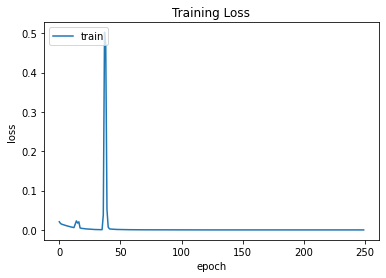

In [15]:
plot_training(history_dict)

Something to notice: big spike between epochs 25 and 50. 

## Evaluate on Test Set

In [16]:
test_loss, test_accuracy = model.evaluate(test_samples,  test_labels, verbose=2)
print('Test accuracy:', test_accuracy)

11/11 - 0s - loss: 3.3646 - accuracy: 0.9448
Test accuracy: 0.9447852969169617


The model's accuracy on the test set is **94.5%**

## Predictions

In [17]:
predictions = model.predict(test_samples) # generates a list of predictions 